In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('simplified_coffee.csv')

#1. Conhecendo o dataset

In [73]:
df.head() #Primeiras 5 linhas do dataset

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [74]:
df.describe() #entender os dados númericos

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


In [75]:
df.describe(include='object') #entender os dados categóricos

,name,roaster,roast,loc_country,origin,review_date,review
count,1246,1246,1234,1246,1246,1246,1246
unique,1142,300,5,12,27,61,1246
top,Ethiopia Kayon Mountain,Kakalove Cafe,Medium-Light,United States,Ethiopia,October 2020,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
freq,6,91,904,774,447,51,1


In [76]:
df.info() #Tipo de dados em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


In [77]:
df.isnull().sum() #descobrindo os dados nulos

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

_______________

#2. Processamento dos dados

###2.1 Tatamento de Valores Nulos

In [78]:
df['roast'].unique() #Valores da Coluna

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', nan, 'Dark'],
      dtype=object)

In [79]:
df['roast'].fillna('Não informado', inplace=True) #Investigar a importância desses dados

In [80]:
df.loc[(df['roast']=='Não informado',)].groupby(['roast','origin','loc_country']).agg({'roast':'count'})

roast
roast         origin   loc_country         
Não informado Brazil   Taiwan             2
              Ethiopia Taiwan             2
                       United States      2
              Panama   England            5
              Yemen    United States      1

In [81]:
df[(df['loc_country']=='Taiwan')].groupby(['roast','loc_country']).agg({'roast':'count'}) #Não é tão relevante para Taiwan

,,roast
roast,loc_country,
Dark,Taiwan,1
Light,Taiwan,73
Medium,Taiwan,30
Medium-Dark,Taiwan,8
Medium-Light,Taiwan,222
Não informado,Taiwan,4


In [82]:
df[(df['loc_country']=='England')].groupby(['roast','loc_country']).agg({'roast':'count'}) #Representa a mior parte das torras da Inglaterra, logo é relevante

,,roast
roast,loc_country,
Medium-Light,England,2
Não informado,England,5


In [83]:
df.groupby(['roast','origin','loc_country']).mean()

100g_USD     rating
roast         origin    loc_country                         
Dark          Indonesia Taiwan           8.500000  94.000000
                        United States    3.450000  88.500000
Light         Brazil    Japan           21.460000  94.000000
              Burundi   United States    6.416667  92.666667
              Colombia  Japan           11.380000  96.000000
...                                           ...        ...
Não informado Brazil    Taiwan           4.135000  94.000000
              Ethiopia  Taiwan           3.170000  93.000000
                        United States    1.330000  93.500000
              Panama    England        108.888000  94.000000
              Yemen     United States   39.680000  96.000000

[137 rows x 2 columns]

###2.2 Investigando Outliers

In [84]:
df['100g_USD'].quantile(0.75)

9.6

In [85]:
out = df[(df['100g_USD']>df['100g_USD'].quantile(0.75))].agg({'roast':'count'})
out

roast    310
dtype: int64

In [86]:
porcen_out = (out/len(df))*100
porcen_out

roast    24.879615
dtype: float64

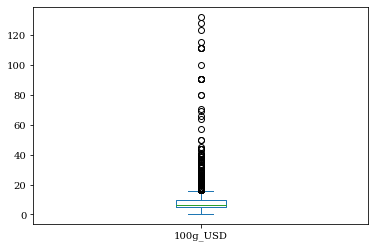

In [87]:
df['100g_USD'].plot(kind = 'box')

In [88]:
Q3 = df['100g_USD'].quantile(0.75)
Q4 = df['100g_USD'].quantile(0.25)

IQR = Q3 - Q4

limsup = Q3 + IQR*1.5

In [89]:
out_z = df[(df['100g_USD']>limsup)].agg({'roast':'count'})
out_z

roast    186
dtype: int64

In [90]:
percent_out_z = (out_z/len(df))*100
percent_out_z

roast    14.927769
dtype: float64

Os dados outliers não vão ser excluídos porque, apesar de alguns destoarem muito, fazem parte da realidade do DF, pois existem cafés que passam por determinados processos que o fazem ter um alto preço

###2.3 Tratando os dados categócos

In [91]:
df['origin'].unique()

array(['Ethiopia', "Hawai'I", 'Kenya', 'Guatemala', 'Colombia', 'Panama',
       'Nicaragua', 'Indonesia', 'Peru', 'Rwanda', 'Nepal', 'Costa Rica',
       'Ecuador', 'Brazil', 'Democratic Republic Of The Congo', 'Burundi',
       'El Salvador', 'Yemen', 'Bolivia', 'Taiwan', 'Mexico',
       'Dominican Republic', 'Honduras', 'Thailand', 'Uganda', 'Tanzania',
       'Philippines'], dtype=object)

In [92]:
df['origin'] = df['origin'].replace('Democratic Republic Of The Congo','Republic Of The Congo') #Diminuindo o tamamho da string

In [93]:
df['origin'].unique()

array(['Ethiopia', "Hawai'I", 'Kenya', 'Guatemala', 'Colombia', 'Panama',
       'Nicaragua', 'Indonesia', 'Peru', 'Rwanda', 'Nepal', 'Costa Rica',
       'Ecuador', 'Brazil', 'Republic Of The Congo', 'Burundi',
       'El Salvador', 'Yemen', 'Bolivia', 'Taiwan', 'Mexico',
       'Dominican Republic', 'Honduras', 'Thailand', 'Uganda', 'Tanzania',
       'Philippines'], dtype=object)

In [94]:
df['loc_country'].unique()

array(['United States', 'Canada', 'Hong Kong', "Hawai'i", 'Taiwan',
       'England', 'Australia', 'Guatemala', 'Japan', 'China', 'Kenya',
       'New Taiwan'], dtype=object)

In [95]:
df['loc_country'] = df['loc_country'].replace('New Taiwan','Taiwan')

In [96]:
df['roaster'].unique()

array(['Revel Coffee', 'Roast House', 'Big Creek Coffee Roasters',
       'Red Rooster Coffee Roaster', "Willoughby's Coffee & Tea",
       'Black Oak Coffee Roasters', 'Wonderstate Coffee',
       'Reunion Island Coffee', 'Old Soul Co.', 'A.R.C.',
       'Paradise Roasters', 'Hula Daddy Kona Coffee', 'Kakalove Cafe',
       'Jackrabbit Java', 'Propeller Coffee',
       'Chocolate Fish Coffee Roasters', 'Lexington Coffee Roasters',
       'Noble Coffee Roasting', "Ben's Beans", 'Espresso Republic',
       'Good Folks Coffee', 'Flight Coffee Co.', 'Green Stone Coffee',
       'Equator Coffees & Teas', 'Klatch Coffee', "Ka'u Specialty Coffee",
       'Simon Hsieh’s Aroma Roast Coffees', "PT's Coffee Roasting",
       'Hala Tree Kona Coffee', 'Barrington Coffee Roasting',
       'The WestBean Coffee Roasters', 'Mystic Monk Coffee',
       'JBC Coffee Roasters', 'Good Chance Biotechnology, Ltd.',
       'Manzanita Roasting Company', 'Bird Rock Coffee Roasters',
       'Temple Coffee and Te

In [97]:
df['roaster'] = df['roaster'].replace('Good Chance Biotechnology, Ltd.','Good Chance Biotechnology')

In [98]:
df['roaster'].unique()

array(['Revel Coffee', 'Roast House', 'Big Creek Coffee Roasters',
       'Red Rooster Coffee Roaster', "Willoughby's Coffee & Tea",
       'Black Oak Coffee Roasters', 'Wonderstate Coffee',
       'Reunion Island Coffee', 'Old Soul Co.', 'A.R.C.',
       'Paradise Roasters', 'Hula Daddy Kona Coffee', 'Kakalove Cafe',
       'Jackrabbit Java', 'Propeller Coffee',
       'Chocolate Fish Coffee Roasters', 'Lexington Coffee Roasters',
       'Noble Coffee Roasting', "Ben's Beans", 'Espresso Republic',
       'Good Folks Coffee', 'Flight Coffee Co.', 'Green Stone Coffee',
       'Equator Coffees & Teas', 'Klatch Coffee', "Ka'u Specialty Coffee",
       'Simon Hsieh’s Aroma Roast Coffees', "PT's Coffee Roasting",
       'Hala Tree Kona Coffee', 'Barrington Coffee Roasting',
       'The WestBean Coffee Roasters', 'Mystic Monk Coffee',
       'JBC Coffee Roasters', 'Good Chance Biotechnology',
       'Manzanita Roasting Company', 'Bird Rock Coffee Roasters',
       'Temple Coffee and Tea', 'D

_________________

# 3. Análise Descritiva dos dados

### 3.1 Análise dos dados

### Rank de notas médias por origem dos grãos, local da torra, tipo de torra, da empresa de torra e café x Rank de preços médios por origem dos grãos, local da torra, tipo de torra, da empresa de torra e café

####**Rank** nota média e preço médio do café por origen dos grãos

In [99]:
ranked_origin = df.groupby(['origin'])['rating'].agg('mean').sort_values(ascending=False)
ranked_origin

origin
Tanzania                 95.000000
Panama                   94.500000
Ecuador                  94.000000
Kenya                    93.874126
Yemen                    93.615385
Hawai'I                  93.451327
Ethiopia                 93.449664
Taiwan                   93.444444
Colombia                 93.172185
Nicaragua                93.090909
Philippines              93.000000
Costa Rica               92.913043
Indonesia                92.821429
Republic Of The Congo    92.714286
Honduras                 92.666667
El Salvador              92.642857
Burundi                  92.500000
Peru                     92.307692
Guatemala                92.302083
Rwanda                   92.250000
Brazil                   92.200000
Uganda                   92.000000
Bolivia                  92.000000
Mexico                   92.000000
Nepal                    91.000000
Dominican Republic       91.000000
Thailand                 90.500000
Name: rating, dtype: float64

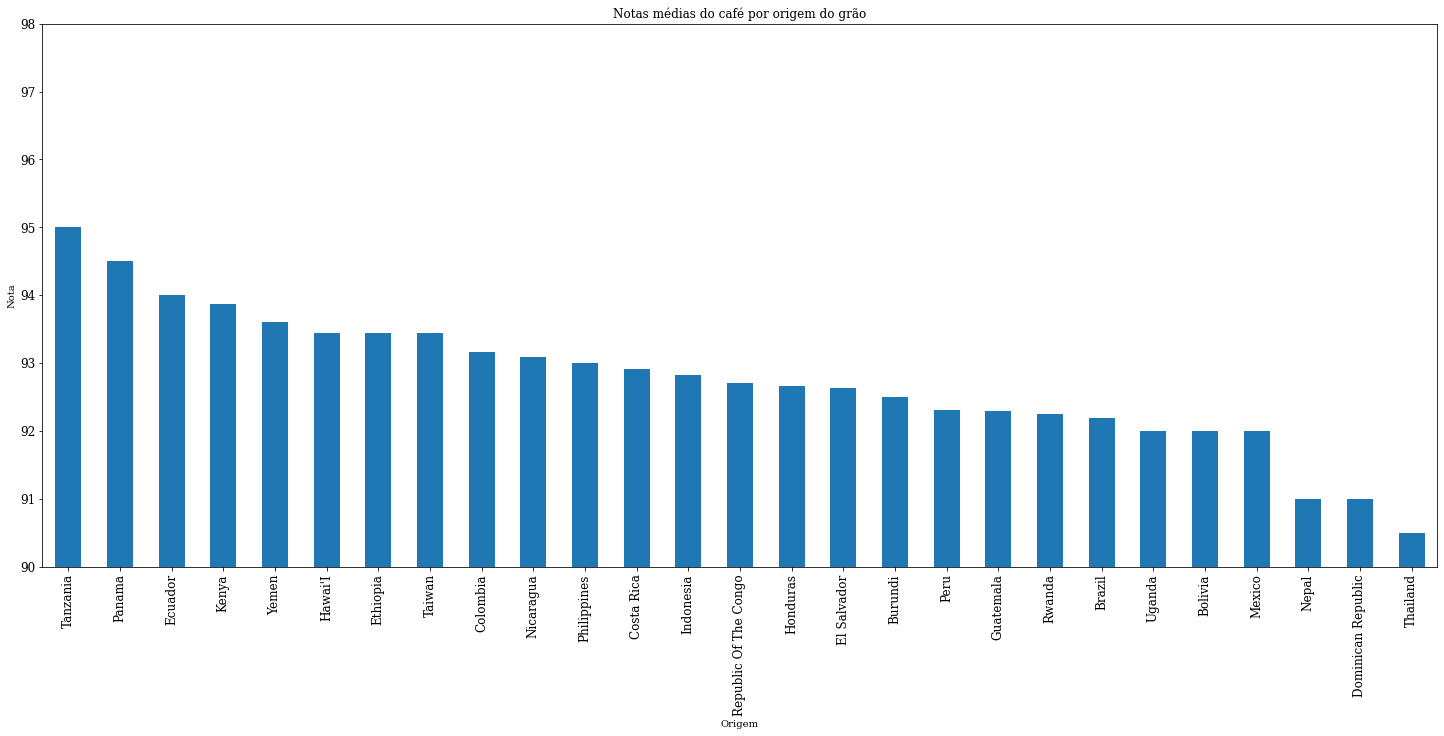

In [100]:
import matplotlib.pyplot as plt
ranked_origin.plot(kind = 'bar',
                 title = 'Notas médias do café por origem do grão',
                 xlabel = 'Origem', fontsize = 12,
                 ylabel = 'Nota');
plt.ylim(90, 98)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [101]:
price_origin = df.groupby(['origin'])['100g_USD'].agg('mean').sort_values(ascending=False)
price_origin

origin
Tanzania                 68.320000
Ecuador                  35.637500
Panama                   32.053571
Taiwan                   20.144444
Hawai'I                  19.437345
Yemen                    16.727692
Philippines              13.670000
Bolivia                  11.910000
Colombia                  9.933046
El Salvador               9.852143
Nicaragua                 8.670909
Nepal                     7.910000
Ethiopia                  7.501544
Kenya                     7.298671
Costa Rica                7.265870
Honduras                  6.386667
Burundi                   6.337500
Brazil                    6.182667
Guatemala                 6.106146
Indonesia                 6.033214
Peru                      5.608462
Uganda                    5.585000
Republic Of The Congo     5.481429
Rwanda                    5.426667
Mexico                    5.385455
Thailand                  4.980000
Dominican Republic        3.820000
Name: 100g_USD, dtype: float64

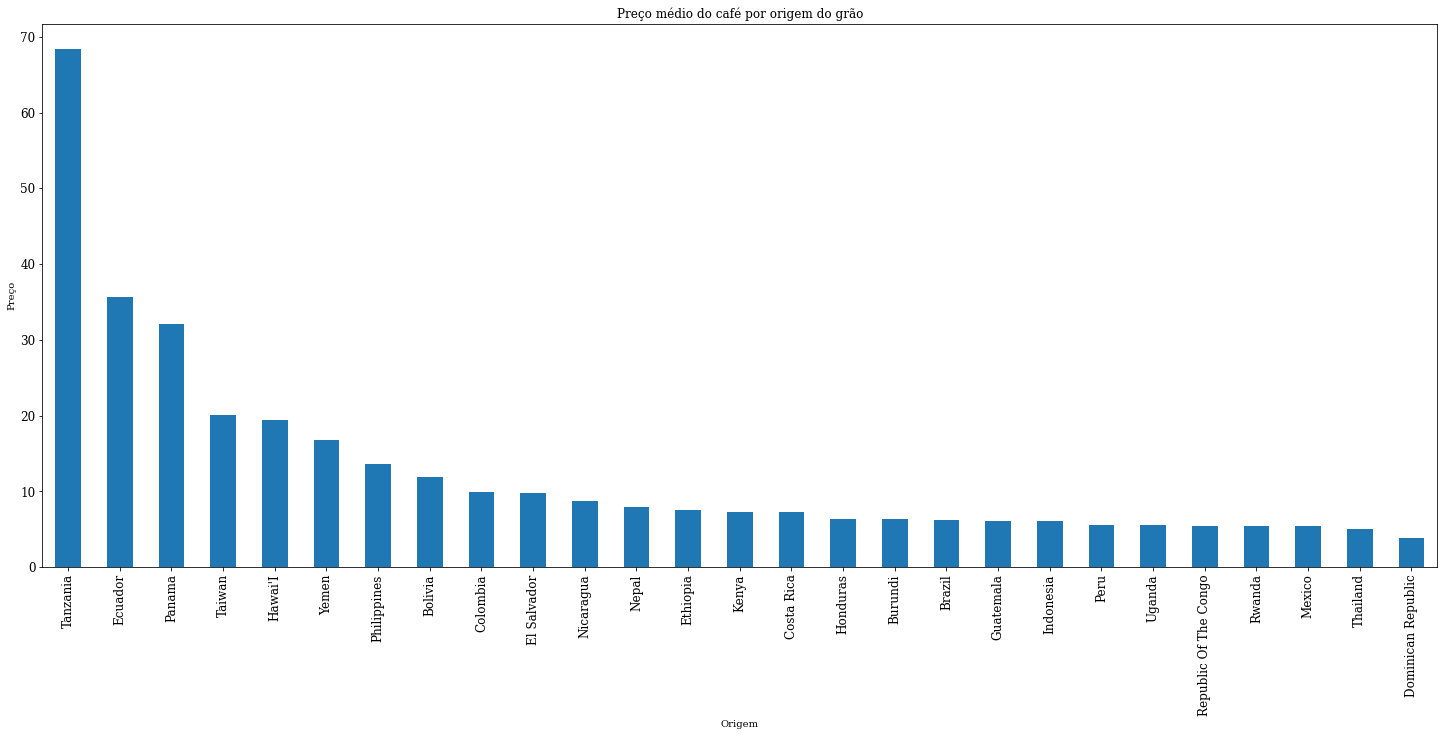

In [102]:
import matplotlib.pyplot as plt
price_origin.plot(kind = 'bar',
                 title = 'Preço médio do café por origem do grão',
                 xlabel = 'Origem', fontsize = 12,
                 ylabel = 'Preço');
fig = plt.gcf()
fig.set_size_inches(25, 10)

Rank nota e preço médio do café por país da torra

In [103]:
ranked_loc = df.groupby(['loc_country'])['rating'].agg('mean').sort_values(ascending=False)
ranked_loc

loc_country
Australia        96.000000
England          94.142857
Kenya            94.000000
Taiwan           93.637168
Canada           93.600000
Hawai'i          93.415584
United States    93.245478
Hong Kong        92.666667
Japan            92.375000
Guatemala        90.500000
China            90.000000
Name: rating, dtype: float64

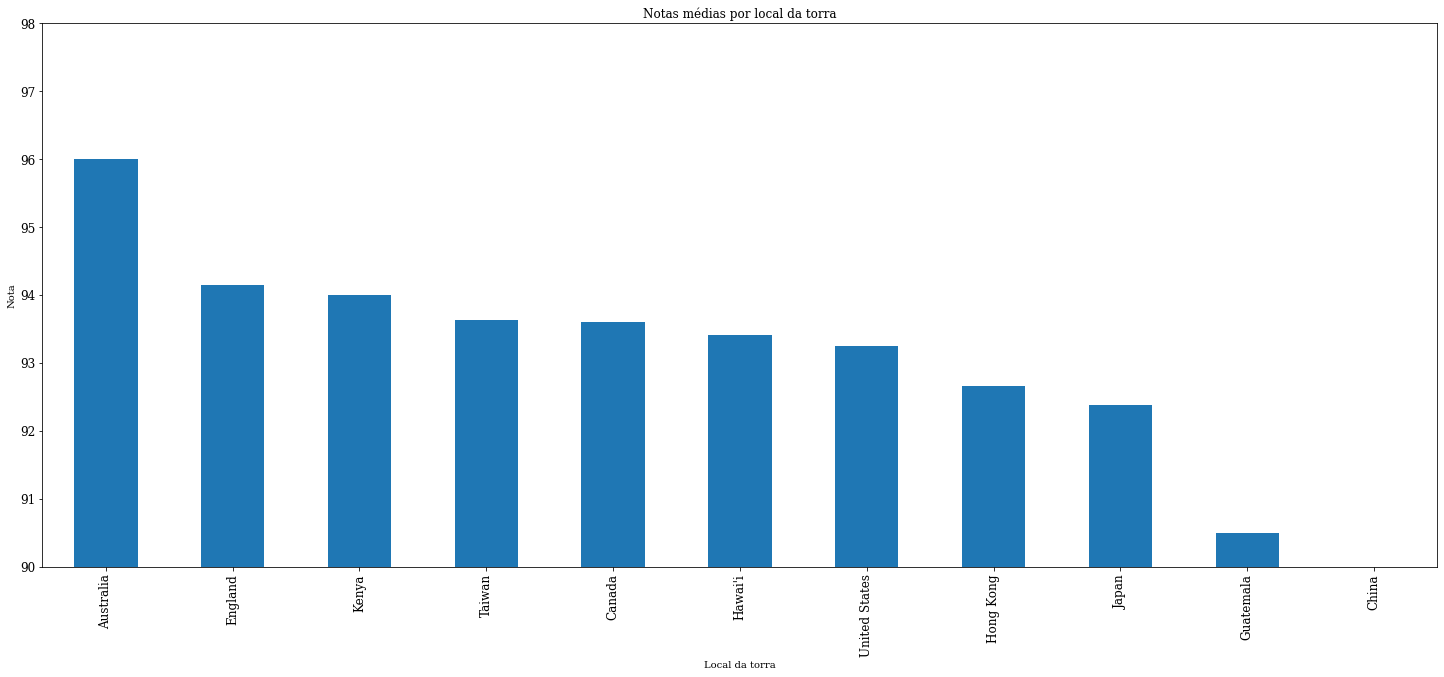

In [104]:
ranked_loc.plot(kind = 'bar',
                 title = 'Notas médias por local da torra',
                 xlabel = 'Local da torra', fontsize = 12,
                 ylabel = 'Nota');
plt.ylim(90, 98)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [105]:
price_loc = df.groupby(['loc_country'])['100g_USD'].agg('mean').sort_values(ascending=False)
price_loc

loc_country
England          92.181429
Australia        69.000000
China            22.530000
Hawai'i          18.151688
Hong Kong        15.617778
Japan            10.748750
Taiwan           10.074130
United States     9.255685
Kenya             6.910000
Canada            4.986000
Guatemala         3.545417
Name: 100g_USD, dtype: float64

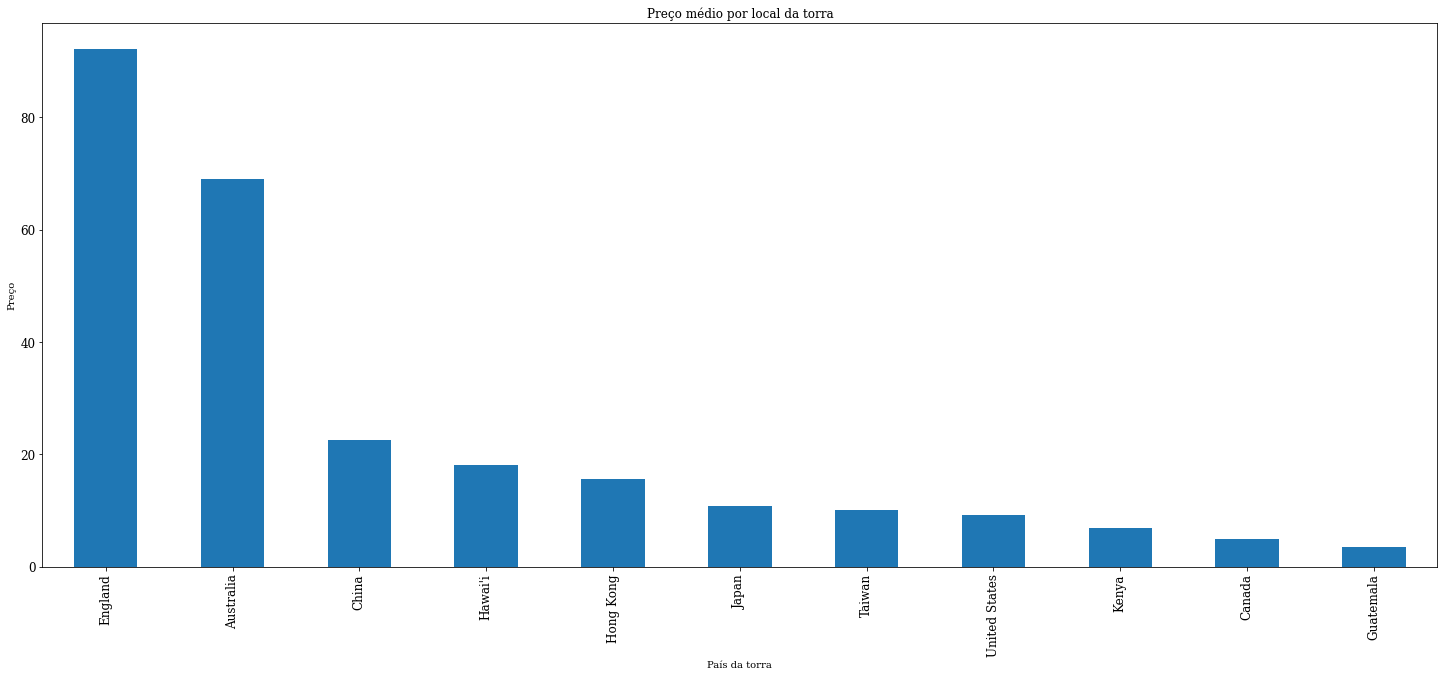

In [106]:
price_loc.plot(kind = 'bar',
                 title = 'Preço médio por local da torra',
                 xlabel = 'País da torra', fontsize = 12,
                 ylabel = 'Preço');
fig = plt.gcf()
fig.set_size_inches(25, 10)

Rank nota média e preço médio por tipo de torra

In [107]:
ranked_roast = df.groupby(['roast'])['rating'].agg('mean').sort_values(ascending=False)
ranked_roast

roast
Não informado    93.916667
Light            93.555556
Medium-Light     93.366150
Medium           92.543860
Medium-Dark      92.333333
Dark             90.333333
Name: rating, dtype: float64

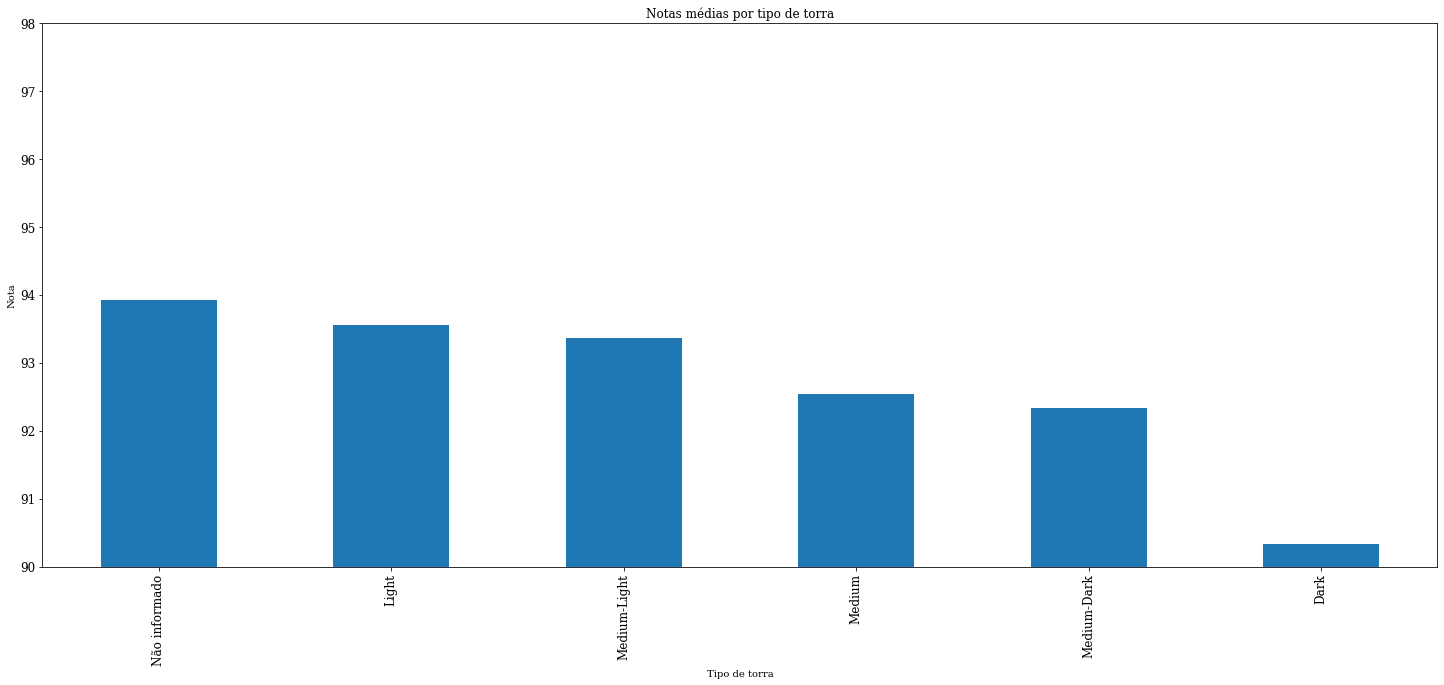

In [108]:
ranked_roast.plot(kind = 'bar',
                 title = 'Notas médias por tipo de torra',
                 xlabel = 'Tipo de torra', fontsize = 12,
                 ylabel = 'Nota');
plt.ylim(90, 98)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [109]:
price_roast = df.groupby(['roast'])['100g_USD'].agg('mean').sort_values(ascending=False)
price_roast

roast
Não informado    50.115833
Medium-Dark      14.410000
Light            11.333131
Medium-Light      9.911305
Medium            8.949737
Dark              5.133333
Name: 100g_USD, dtype: float64

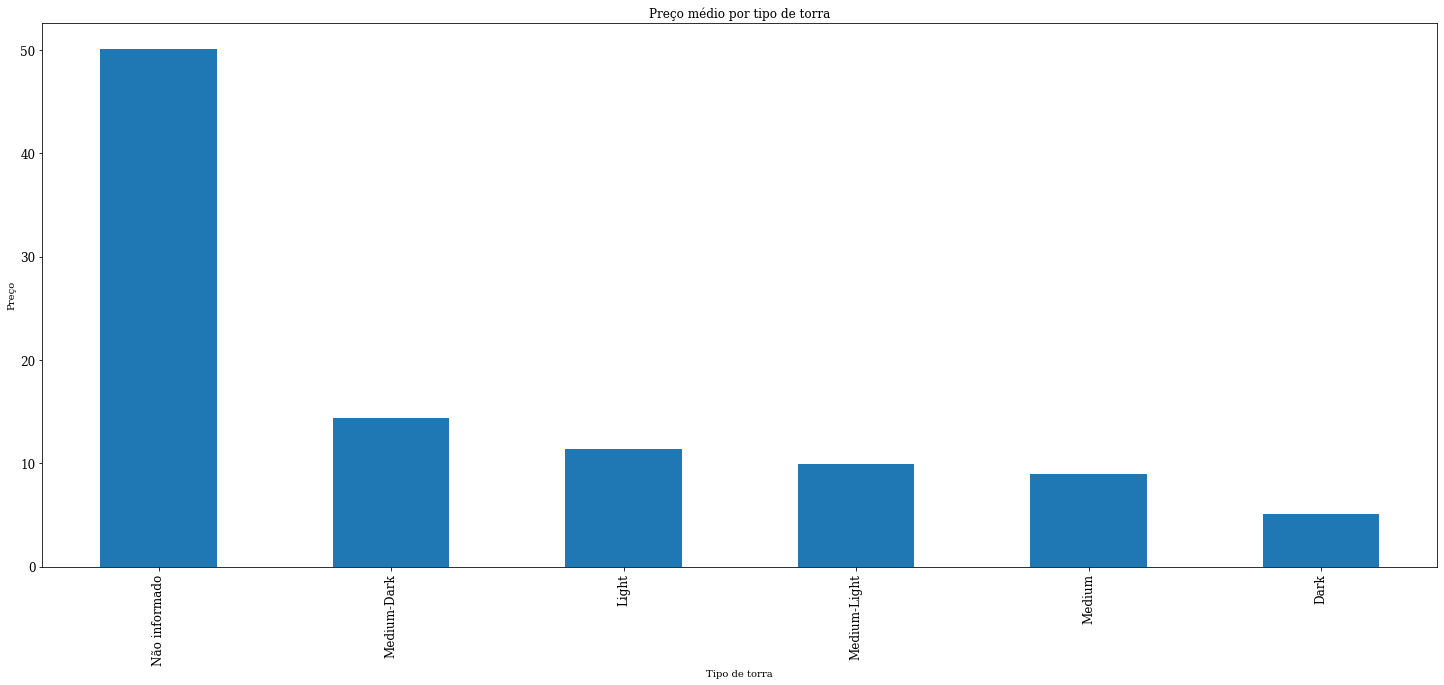

In [110]:
price_roast.plot(kind = 'bar',
                 title = 'Preço médio por tipo de torra',
                 xlabel = 'Tipo de torra', fontsize = 12,
                 ylabel = 'Preço');
fig = plt.gcf()
fig.set_size_inches(25, 10)

Rank nota média e preço top 20 torrador

In [111]:
ranked_roaster = df.groupby(['roaster'])['rating'].agg('mean').sort_values(ascending=False).nlargest(20)
ranked_roaster

roaster
Port of Mokha                       96.000
Kakalove Café                       96.000
Campos Coffee                       96.000
Genesis Coffee Lab                  95.500
Hula Daddy Kona Coffee              95.125
Taster’s Coffee                     95.000
Rusty’s Hawaiian                    95.000
San Francisco Bay Coffee Company    95.000
One Fresh Cup                       95.000
Cafe Unido                          95.000
Per’la Specialty Roasters           95.000
DoDo Kaffa                          95.000
Ramshead Coffee Roasters            95.000
Small Eyes Café                     95.000
Taokas Coffee                       95.000
JYL Cafe                            95.000
Ho Soo Tsai                         95.000
Good Folks Coffee                   95.000
Fumi Coffee Company                 95.000
Felala Coffee Lab                   95.000
Name: rating, dtype: float64

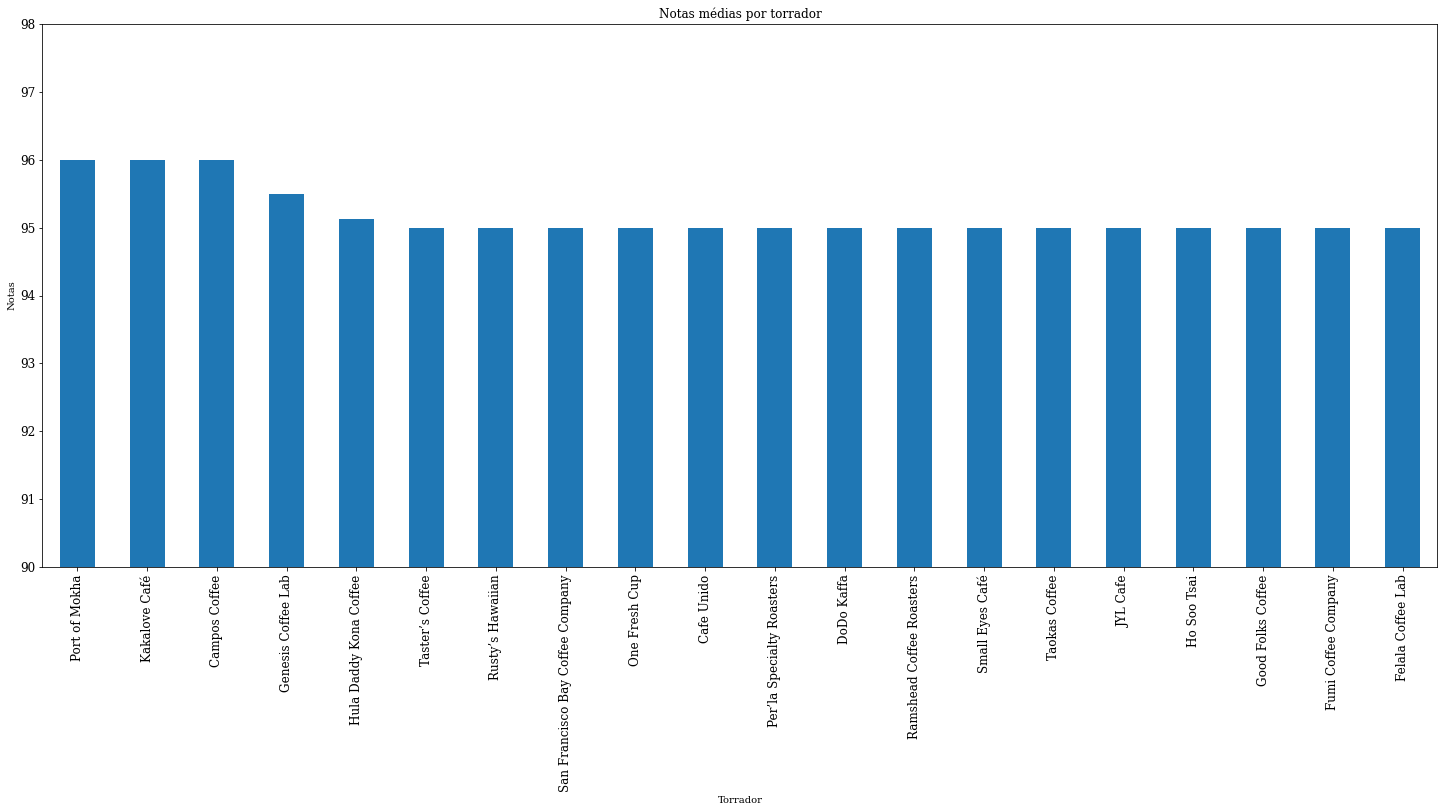

In [112]:
ranked_roaster.plot(kind = 'bar',
                 title = 'Notas médias por torrador',
                 xlabel = 'Torrador', fontsize = 12,
                 ylabel = 'Notas');
plt.ylim(90, 98)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [113]:
price_roaster = df.groupby(['roaster'])['100g_USD'].agg('mean').sort_values(ascending=False).nlargest(20)
price_roaster

roaster
Difference Coffee                  104.073333
Good Chance Biotechnology           90.830000
Genesis Coffee Lab                  75.620000
Campos Coffee                       69.000000
Bona Kafo Roastery                  43.825000
Chromatic Coffee                    39.860000
Port of Mokha                       39.680000
Simon Hsieh Aroma Roast Coffees     34.088000
Equator Coffees & Teas              32.630000
Black Coffee In Black Jar           32.000000
Hidden Coffee HK                    28.470000
Monarch Coffee                      28.203333
Lucky Cafe                          25.600000
Hula Daddy Kona Coffee              24.780000
Cafe Unido                          23.520000
Mute Roaster                        22.530000
Rusty’s Hawaiian                    22.050000
Mudhouse Coffee Roasters            22.050000
Kakalove Café                       21.240000
Kona Farm Direct                    21.028750
Name: 100g_USD, dtype: float64

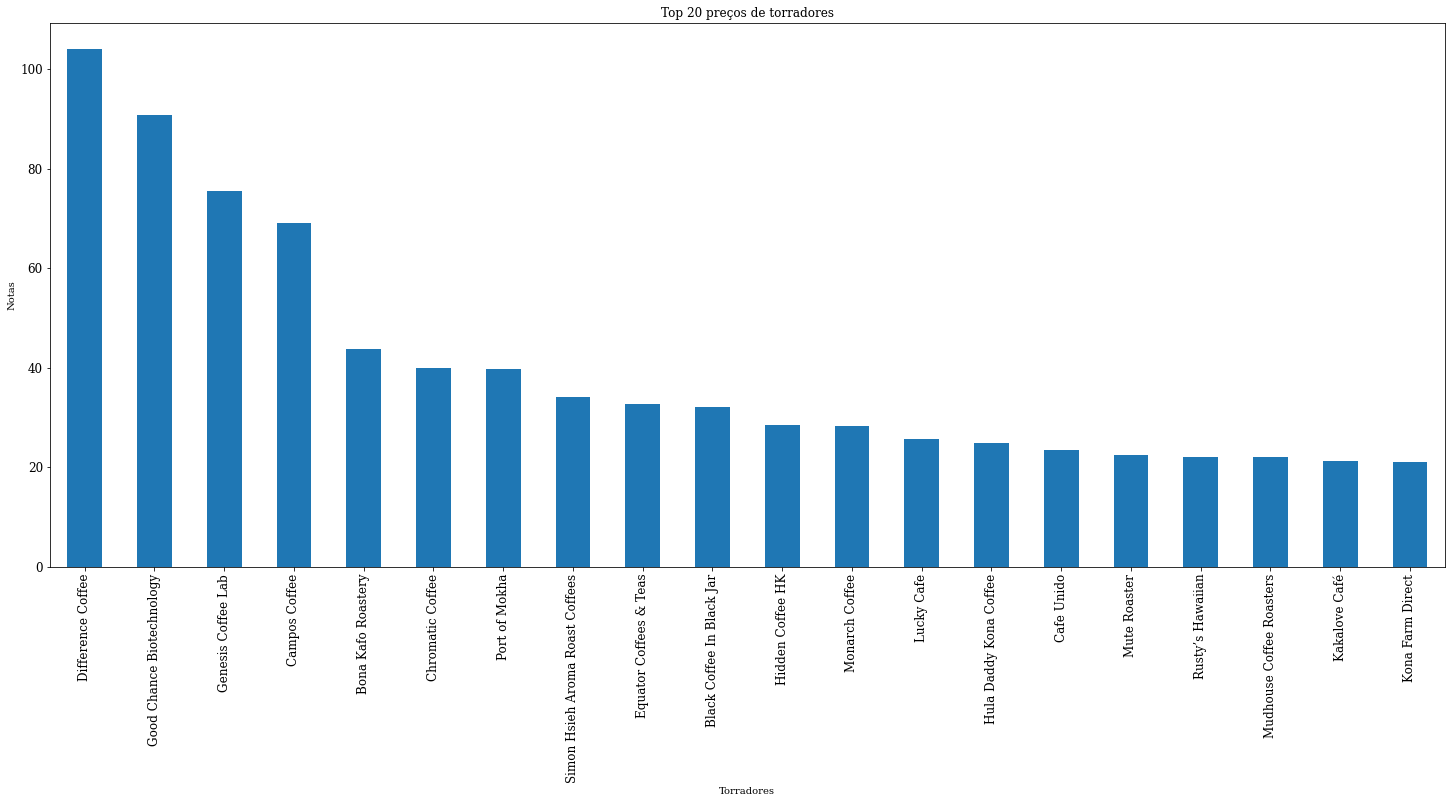

In [114]:
price_roaster.plot(kind = 'bar',
                 title = 'Top 20 preços de torradores',
                 xlabel = 'Torradores', fontsize = 12,
                 ylabel = 'Notas');
fig = plt.gcf()
fig.set_size_inches(25, 10)

Rank nota e preço do café por café

In [115]:
ranked_name = df.groupby(['name'])['rating'].agg('max').sort_values(ascending=False).nlargest(20)
ranked_name

name
Rukera Espresso                              97
Panama Ninety Plus Perci Lot 50              97
Testi Ayla Double Ethiopia                   97
Mama Cata Mokkita                            97
Colombia Finca El Paraiso Geisha Letty       97
Ethiopia Natural Guji D Minor Special Lot    97
Kenya Karindundu AA Small Lot Reserve        97
Rukera Kenya                                 97
100% Kona SL-28                              97
Ardent Ethiopia Natural                      97
Karimiuki Espresso                           96
Ethiopia Wush Wush                           96
Karen J Kona Red Bourbon                     96
Panama Finca Kalithea Natural Geisha         96
Geisha XO                                    96
Ethiopia Natural Sidama TAMIRU 74158         96
Kenya Washed Nyeri Hill Farm AA Top          96
Kenya Washed Kiambu Uklili AB Espresso       96
Dodora Double                                96
Ecuador Taza Dorada Finca Cruz Loma          96
Name: rating, dtype: int64

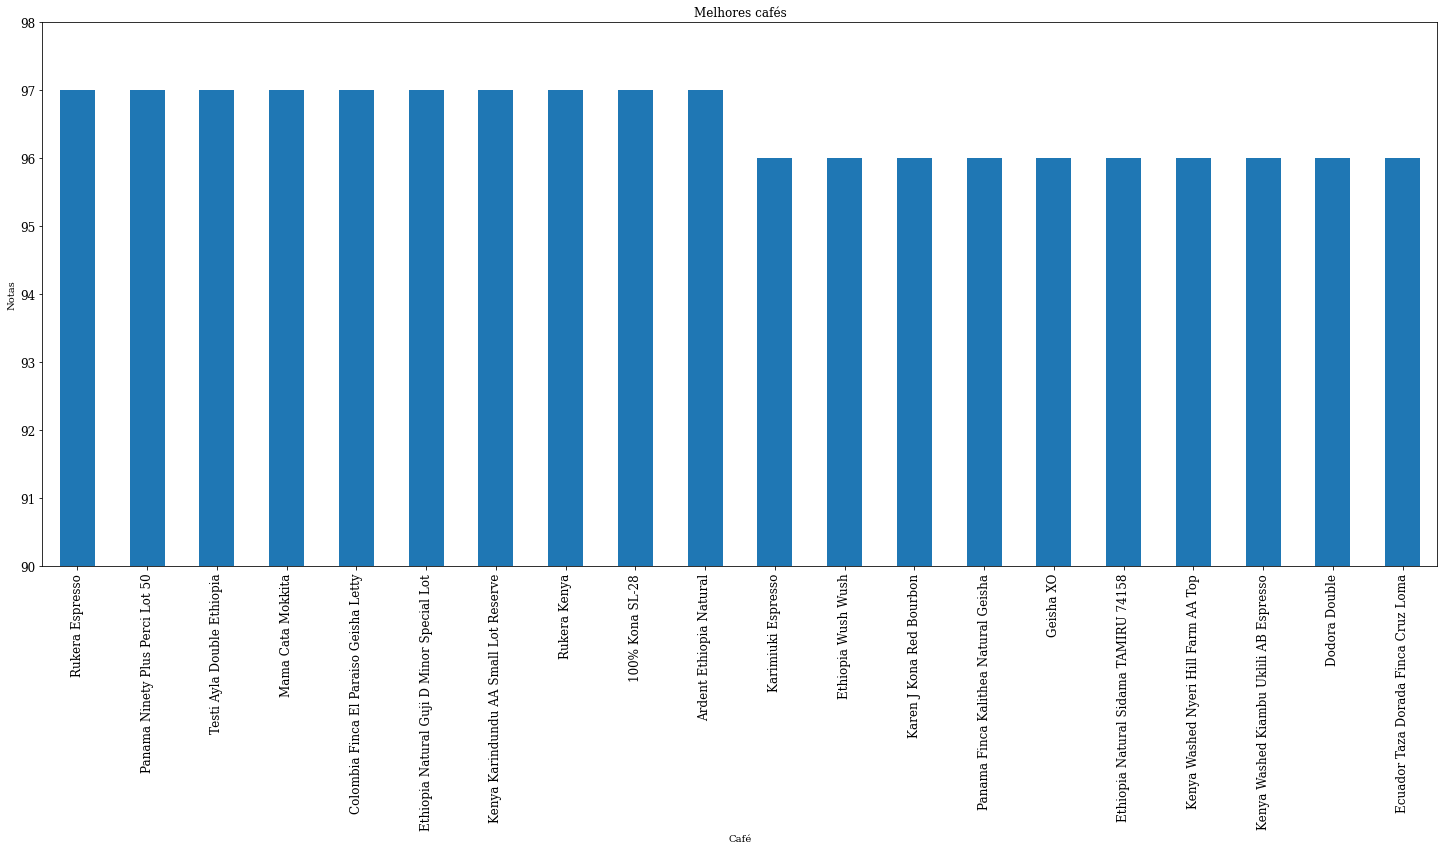

In [116]:
ranked_name.plot(kind = 'bar',
                 title = 'Melhores cafés',
                 xlabel = 'Café', fontsize = 12,
                 ylabel = 'Notas');
plt.ylim(90, 98)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [117]:
price_name = df.groupby(['name'])['100g_USD'].agg('max').sort_values(ascending=False).nlargest(20)
price_name

name
Mama Cata Mokkita                                                       132.28
Ethiopia Tamiru Tadesse Anaerobic                                       127.87
Ecuador Taza Dorada Finca Cruz Loma                                     123.46
Ecuador Finca Cruz Loma                                                 115.20
Esmeralda Estate Panama Geisha                                          111.11
Ethiopia Civet Sidama Papilio Natural                                    90.83
Civet Yirgacheffe Sisota                                                 90.83
Civet Ethiopia Papilio Sidamo                                            90.83
Magic Cat Civet Ethiopia Sidamo Shantwene Litchi Rose Washed             90.83
Magic Cat Kenya Civet AFCA TOH NO.2 Gatuya Factory New Murarandia AA     90.83
Hacienda La Esmeralda Montañas 71AS                                      80.00
Panama Boquete Torre Lot #1 Geisha Honey                                 80.00
Tanzania Acacia Hills Gesha Peaberry           

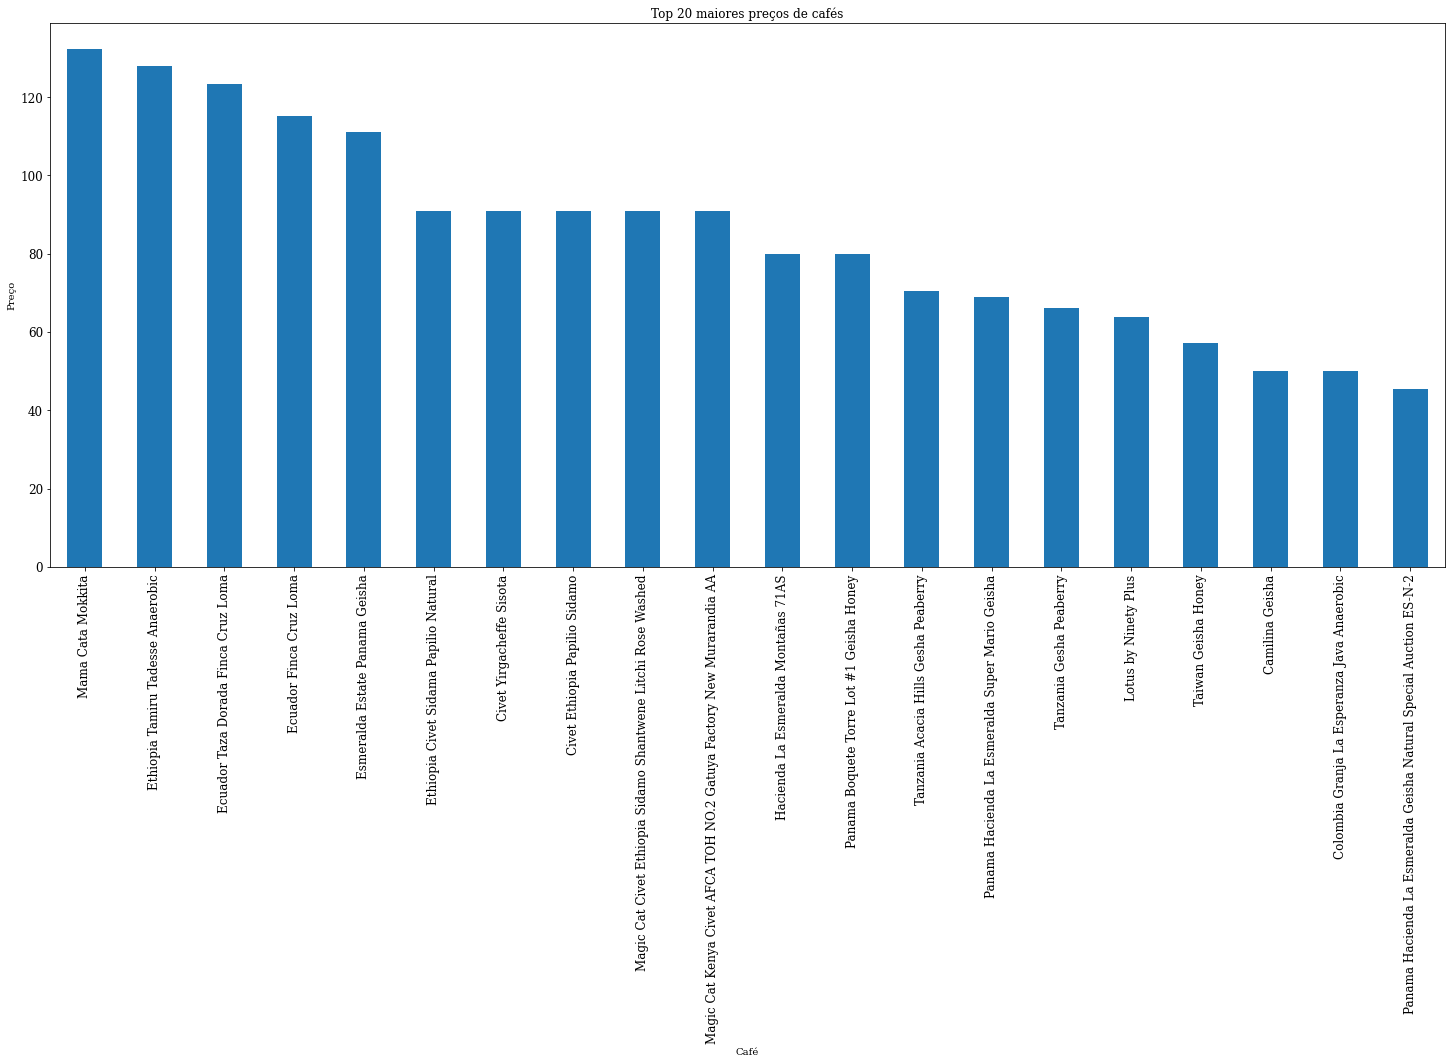

In [118]:
price_name.plot(kind = 'bar',
                 title = 'Top 20 maiores preços de cafés',
                 xlabel = 'Café', fontsize = 12,
                 ylabel = 'Preço');
fig = plt.gcf()
fig.set_size_inches(25, 10)


### Relações entre origem e local da torra

In [119]:
!pip install pySankey

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey
import plotly.graph_objects as go

In [121]:
df_temp1 = df.groupby(['origin','loc_country'])['name'].size().reset_index(name='count')
df_temp1

,origin,loc_country,count
0,Bolivia,Hong Kong,1
1,Bolivia,United States,1
2,Brazil,Japan,1
3,Brazil,Taiwan,5
4,Brazil,United States,9
...,...,...,...
63,Thailand,United States,2
64,Uganda,United States,2
65,Yemen,England,1
66,Yemen,Taiwan,2


In [122]:
import matplotlib.cm as cm
import random

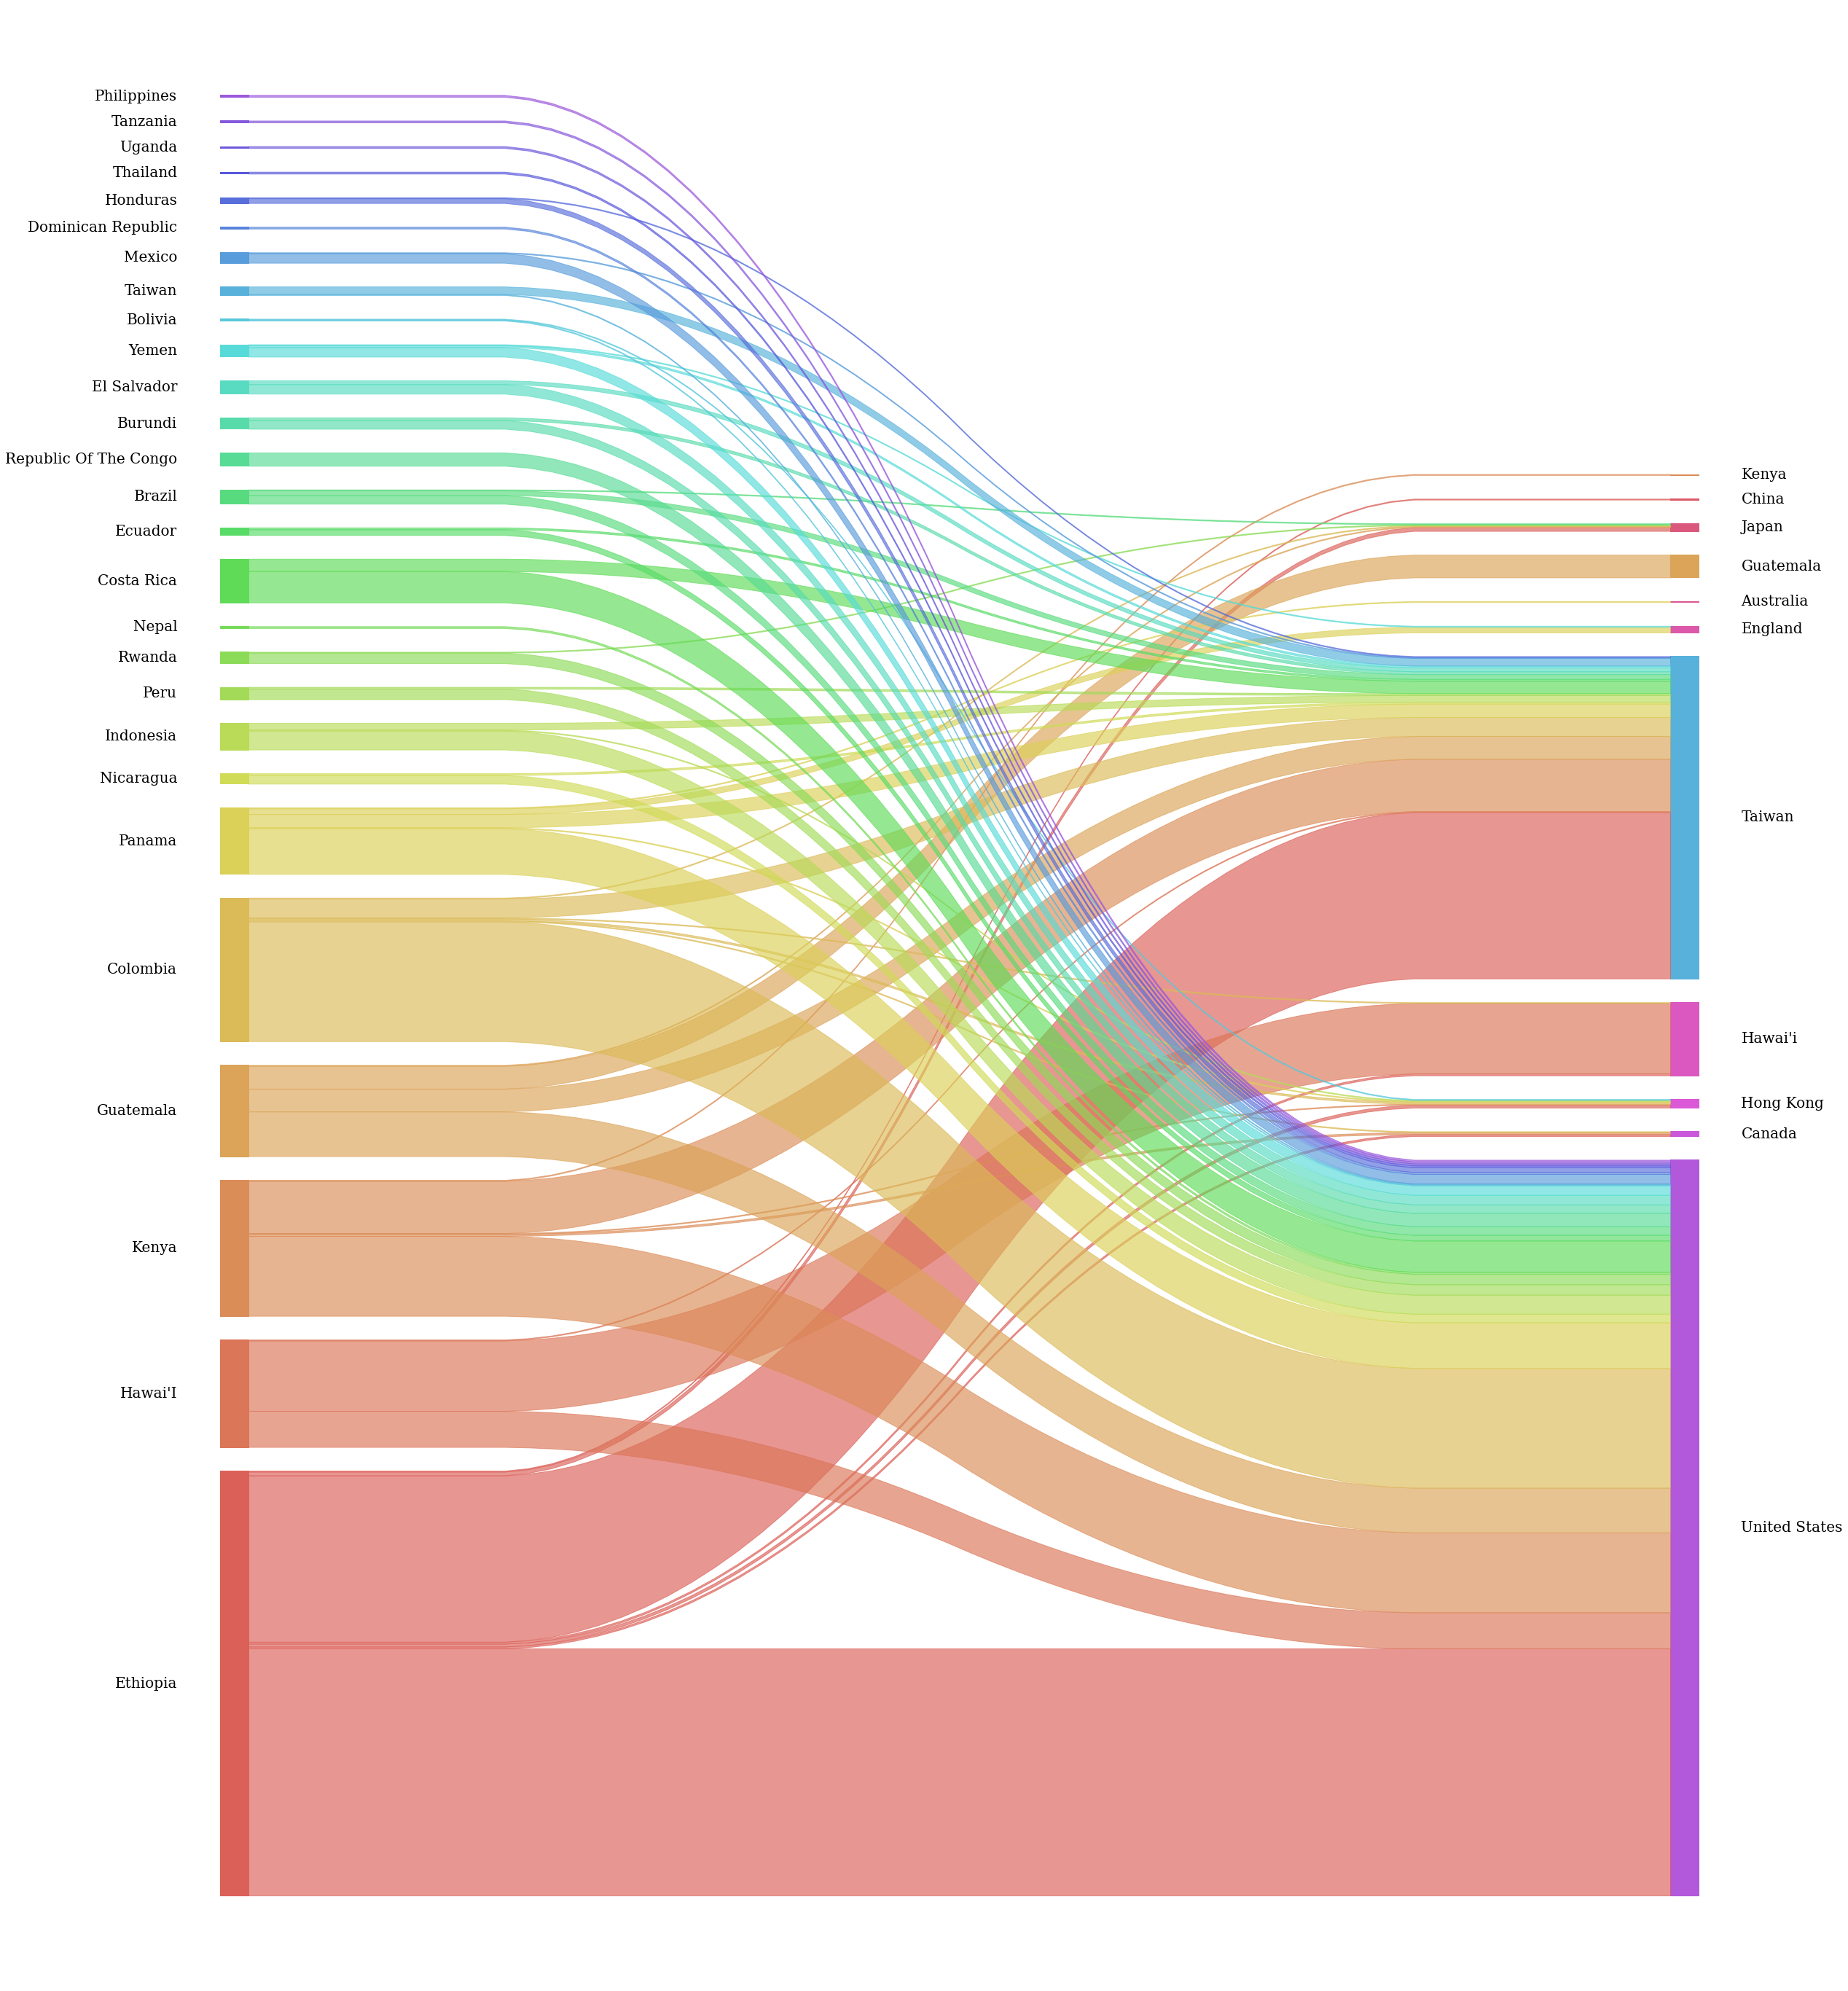

In [123]:
sankey(
    left=df["origin"], right=df["loc_country"],
    aspect=40, fontsize=20
)
fig = plt.gcf()
fig.set_size_inches(40, 50)

### 3.2 Correlção entre as colunas númericas

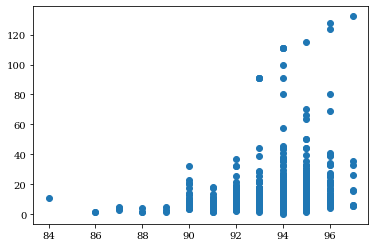

In [124]:
plt.scatter(df['rating'], df['100g_USD'])
plt.show()

É possível notar que existem cafés com baixo preço e ocupam as notas mais altas, logo pode existir uma correlação, mas não é forte

In [125]:
df.corr()

,100g_USD,rating
100g_USD,1.000000,0.241615
rating,0.241615,1.000000


Aqui fica claro a correlação positiva, mas não tão forte

## 4. Sumarizando

##* O preço não define a nota do café, mas existe uma fraca correlação diretamente proporcional
##* A maior parte dos tostadores trazem grãos da Ethiopia
##* A maior parte dos tostadores estão nos Estados Unidos

##A seguir, top das notas
##Melhores notas médias
####Top 3 por país de origem do grão
####Tanzania                 95
####Panama                   94
####Ecuador                  94


---


###Top 3 países das torras
####Australia        96
####England          94
####Kenya            94

###Top 3 tipos de torra
####Não informado    93.91
####Light            93.55
####Medium-Light     93.36

#####*Obs: A categoria não informado não foi excluída pois, dependendo da política da empresa, o tipo de torra é confidencial por uma questão de competitividade. *
---


###Top 10 cafés 
#####ukera Espresso                              97
####Panama Ninety Plus Perci Lot 50              97
####Testi Ayla Double Ethiopia                   97
####Mama Cata Mokkita                            97
####Colombia Finca El Paraiso Geisha Letty       97
####Ethiopia Natural Guji D Minor Special Lot    97
####Kenya Karindundu AA Small Lot Reserve        97
####Rukera Kenya                                 97
####100% Kona SL-28                              97


---


###Top 3 empresas de torras
####Port of Mokha                       96
####Kakalove Café                       96
####Campos Coffee                       96